In [225]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

In [318]:
#show topic getting functionalities at the word "bank"
#corpus consists of 11 documents: 6 finance related, 5 park related

corpus = [['bank','tree','park','way'],
        ['park','green','way','bank','tree'],
        ['bank','way','flower','green'],
        ['bank','green','flower'],
        ['tree','flower','bank'],
          
        ['money','credit','bank','finance'],
        ['bank','finance','money'], 
        ['bank','money','sell'],
        ['finance','money','bank'],
        ['finance','credit','sell'],
        ['bank','finance','credit']]

dictionary = Dictionary(corpus)
corpus = [dictionary.doc2bow(text) for text in corpus]

In [319]:
numpy.random.seed(2) #setting random seed to get the same results each time.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2)      #LDA model, 2 topics

## Topic-word distribution
show.topics(): list of topics, each represented either as a string (when formatted == True) or word-probability pairs <br>
get_term_topics(): get the most relevant topics to the given word <br>
get_document_topics(): get the topic distribution for the given document

In [320]:
model.show_topics()
#topic1 : park / topic2 : financial

[(0,
  '0.244*"bank" + 0.121*"flower" + 0.119*"green" + 0.105*"way" + 0.088*"money" + 0.071*"tree" + 0.069*"sell" + 0.064*"park" + 0.059*"credit" + 0.059*"finance"'),
 (1,
  '0.218*"bank" + 0.176*"finance" + 0.117*"money" + 0.102*"credit" + 0.093*"tree" + 0.066*"way" + 0.061*"park" + 0.058*"sell" + 0.056*"green" + 0.054*"flower"')]

In [321]:
model.get_term_topics('green') 

[(0, 0.098726064), (1, 0.039258465)]

In [322]:
model.get_term_topics('finance')

[(0, 0.03777989), (1, 0.16103469)]

In [323]:
model.get_term_topics('bank') #very similiar probabilities

[(0, 0.22591245), (1, 0.20330177)]

#### get_document_topics

In [324]:
bow_park = ['bank','green','tree']
bow_finance = ['bank','finance','money']

In [325]:
bow = model.id2word.doc2bow(bow_park) # convert to bag of words format first
doc_topics, word_topics, phi_values = model.get_document_topics(bow, per_word_topics=True)

word_topics

[(0, [0, 1]), (2, [0, 1]), (4, [0, 1])]

The get_document_topics method returns the word_type followed by a list sorted with the most likely topic ids, when per_word_topics is set as true. <br>
Output: (word ID, #1 related topic, #2 related topic, ....)

phi_values contains the phi values for each topic for that particular word, scaled by feature length. Phi is essentially the probability of that word in that document belonging to a particular topic. Phi is essentially the probability of that word in that document belonging to a particular topic.

In [326]:
phi_values

[(0, [(0, 0.82837194), (1, 0.17162809)]),
 (2, [(0, 0.7407688), (1, 0.2592312)]),
 (4, [(0, 0.91612756), (1, 0.08387247)])]

Output: <br>
word ID, (#1 related topic, probability to this topic), (#2 related topic, probability to this topic), (..., ...)

In [327]:
bow = model.id2word.doc2bow(bow_finance) # convert to bag of words format first
doc_topics, word_topics, phi_values = model.get_document_topics(bow, per_word_topics=True)

word_topics

[(0, [1, 0]), (7, [1, 0]), (8, [1, 0])]

based on the context, the most likely topic associated with a word can change: now, bank is most related with Topic 1 (financial) <br>
difference in comparison to "get_term_topics": last one is a static topic distribution

In [328]:
#get topics for the whole corpus

topics = model.get_document_topics(corpus, per_word_topics=True)
all_topics = [(doc_topics, word_topics, word_phis) for doc_topics, word_topics, word_phis in topics]

In [329]:
doc_topic, word_topics, phi_values = all_topics[2]
print('Document topics:', doc_topics)
print('Word topics:', word_topics)
print('Phi values:', phi_values)

Document topics: [(0, 0.17162234), (1, 0.82837766)]
Word topics: [(0, [0, 1]), (3, [0, 1]), (4, [0, 1]), (5, [0, 1])]
Phi values: [(0, [(0, 0.9463102), (1, 0.05368977)]), (3, [(0, 0.9640385), (1, 0.03596153)]), (4, [(0, 0.9755429), (1, 0.024457099)]), (5, [(0, 0.9766519), (1, 0.023348177)])]


In [330]:
for doc in all_topics:
    print('New Document \n')
    print('Document topic:', doc[0])
    print('Word topic:', doc[1])
    print('Phi value:', doc[2])
    print(" ")
    print('-------------- \n')

New Document 

Document topic: [(0, 0.66362303), (1, 0.336377)]
Word topic: [(0, [0, 1]), (1, [0, 1]), (2, [0, 1]), (3, [0, 1])]
Phi value: [(0, [(0, 0.7216345), (1, 0.27836552)]), (1, [(0, 0.6948667), (1, 0.30513325)]), (2, [(0, 0.6054962), (1, 0.39450386)]), (3, [(0, 0.7976897), (1, 0.20231026)])]
 
-------------- 

New Document 

Document topic: [(0, 0.8421966), (1, 0.15780342)]
Word topic: [(0, [0, 1]), (1, [0, 1]), (2, [0, 1]), (3, [0, 1]), (4, [0, 1])]
Phi value: [(0, [(0, 0.90817386), (1, 0.091826186)]), (1, [(0, 0.89677805), (1, 0.10322202)]), (2, [(0, 0.8541308), (1, 0.1458692)]), (3, [(0, 0.9376652), (1, 0.06233488)]), (4, [(0, 0.9572324), (1, 0.04276765)])]
 
-------------- 

New Document 

Document topic: [(0, 0.87244034), (1, 0.12755963)]
Word topic: [(0, [0, 1]), (3, [0, 1]), (4, [0, 1]), (5, [0, 1])]
Phi value: [(0, [(0, 0.9463102), (1, 0.05368977)]), (3, [(0, 0.9640385), (1, 0.03596153)]), (4, [(0, 0.9755429), (1, 0.024457099)]), (5, [(0, 0.9766519), (1, 0.023348177)])]

In [331]:
#direcly print all the information from the corpus
'''  
all_topics = model.get_document_topics(corpus, per_word_topics=True)
for doc_topics, word_topics, phi_values in all_topics:
    print('New Document \n')
    print('Document topics:', doc_topics)
    print('Word topics:', word_topics)
    print('Phi values:', phi_values)
    print(" ")
    print('-------------- \n')
'''

'  \nall_topics = model.get_document_topics(corpus, per_word_topics=True)\nfor doc_topics, word_topics, phi_values in all_topics:\n    print(\'New Document \n\')\n    print(\'Document topics:\', doc_topics)\n    print(\'Word topics:\', word_topics)\n    print(\'Phi values:\', phi_values)\n    print(" ")\n    print(\'-------------- \n\')\n'

### Coloring topic words

In [332]:
# this is a sample method to color words, many different ways to do it

def color_words(model, doc):
    import matplotlib.pyplot as plt
    
    #create bag of words
    doc = model.id2word.doc2bow(doc)
    #get_document_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)

    #define topic-color
    topic_colors = { 1:'red', 0:'blue'}
    
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    #define space of each word printout
    word_pos = 1/len(doc)
    
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  #only color of most relaterd topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

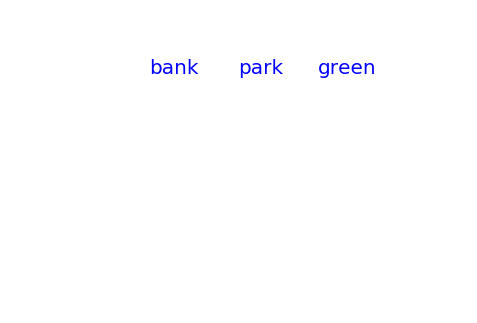

In [333]:
bow_park = ['bank','green','park']
color_words(model, bow_park)

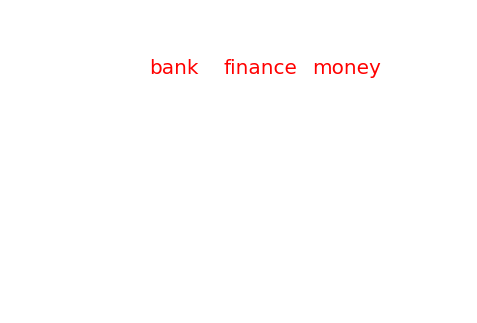

In [334]:
bow_finance = ['bank','finance','money']
color_words(model, bow_finance)

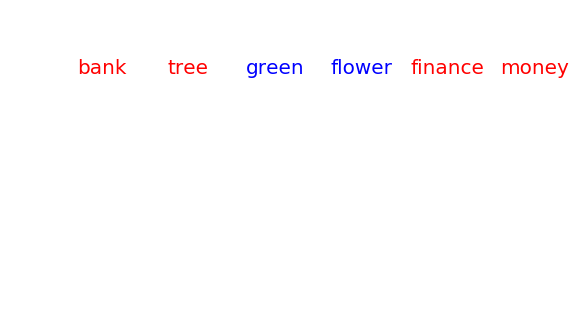

In [335]:
doc = ['bank', 'money', 'finance', 'flower','green','tree']
color_words(model, doc)

In [336]:
def  color_words_dict(model, dictionary):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    word_topics = []
    for word_id in dictionary:
        word = str(dictionary[word_id])
        # get_term_topics returns static topics, as mentioned before
        probs = model.get_term_topics(word)
        # we are creating word_topics which is similar to the one created by get_document_topics
        try:
            if probs[0][1] >= probs[1][1]:
                word_topics.append((word_id, [0, 1]))
            else:
                word_topics.append((word_id, [1, 0]))
        # this in the case only one topic is returned
        except IndexError:
            word_topics.append((word_id, [probs[0][0]]))
            
    # color-topic matching
    topic_colors = { 1:'red', 0:'blue'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
         
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

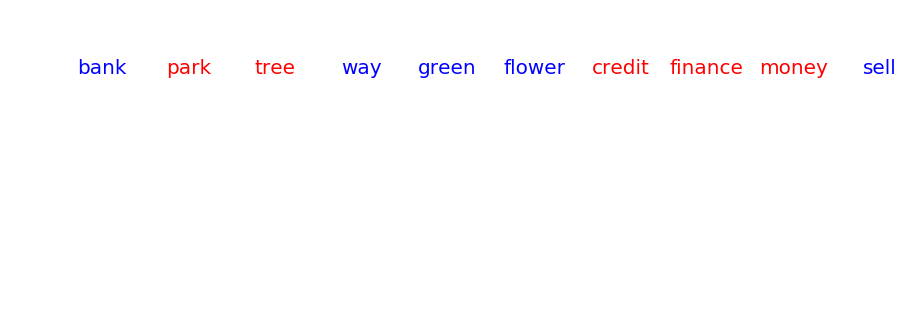

In [337]:
color_words_dict(model, dictionary)